In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df.shape

(1461, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
print("Jumlah data duplikat :", df.duplicated().sum())

Jumlah data duplikat : 0


In [ ]:
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['weather'] = label_encoder.fit_transform(df['weather'])
df['weather'].value_counts()

2    641
4    640
1    101
0     53
3     26
Name: weather, dtype: int64

Mengubah nilai kolom target(y)/Weather menjadi numerik
0 : drizzle
1 : fog
2 : rain
3 : snow
4 : sun


In [ ]:
df.drop(['date'], axis=1, inplace=True)
df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2
1457,1.5,5.0,1.7,1.3,2
1458,0.0,7.2,0.6,2.6,1
1459,0.0,5.6,-1.0,3.4,4


In [ ]:
df.corr()

,precipitation,temp_max,temp_min,wind,weather
precipitation,1.000000,-0.228555,-0.072684,0.328045,-0.267388
temp_max,-0.228555,1.000000,0.875687,-0.164857,0.322337
temp_min,-0.072684,0.875687,1.000000,-0.074185,0.154981
wind,0.328045,-0.164857,-0.074185,1.000000,-0.065858
weather,-0.267388,0.322337,0.154981,-0.065858,1.000000


<Axes: xlabel='precipitation'>

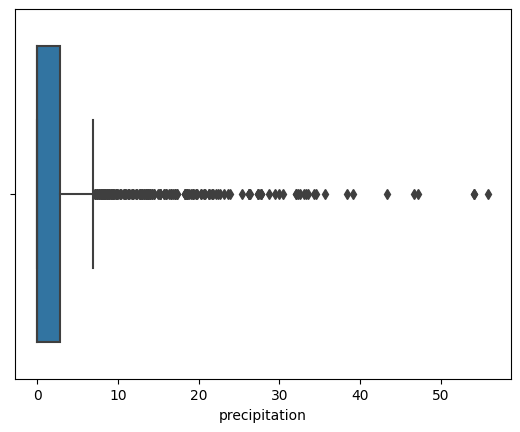

In [ ]:
sns.boxplot(x='precipitation', data=df)

<Axes: xlabel='temp_max'>

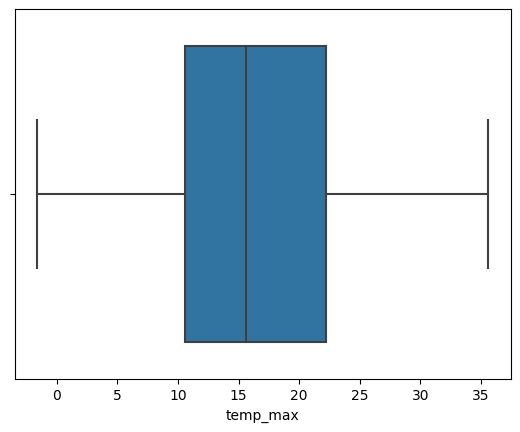

In [ ]:
sns.boxplot(x='temp_max', data=df)

<Axes: xlabel='temp_min'>

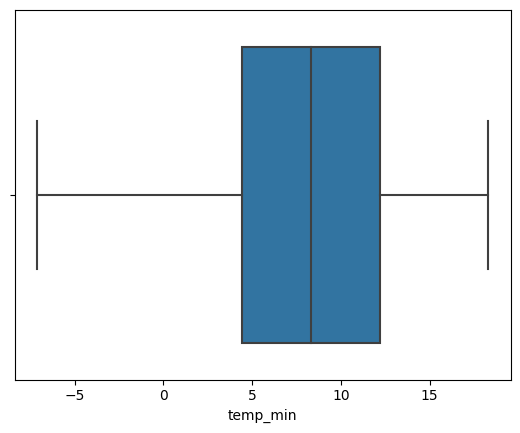

In [ ]:
sns.boxplot(x='temp_min', data=df)

<Axes: xlabel='wind'>

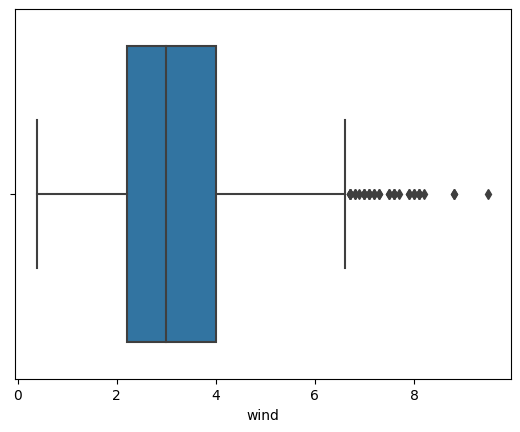

In [ ]:
sns.boxplot(x='wind', data=df)

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('weather', axis=1)
y = df['weather']

In [ ]:
X

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [ ]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int64

In [ ]:
#ss = StandardScaler()
#X_train=ss.fit_transform(X_train)
#X_test=ss.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)



In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Akurasi Pelatihan:", logreg.score(X_train,y_train))
print("Akurasi Testing:", logreg.score(X_test,y_test))

Akurasi Pelatihan: 0.8493150684931506
Akurasi Testing: 0.8327645051194539


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score



In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)
print("Akurasi Pelatihan:", knn.score(X_train,y_train))
print("Akurasi Testing:", knn.score(X_test,y_test))

Akurasi Pelatihan: 0.839041095890411
Akurasi Testing: 0.7679180887372014


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)
print("Akurasi Pelatihan:", dt.score(X_train,y_train))
print("Akurasi Testing:", dt.score(X_test,y_test))

Akurasi Pelatihan: 0.997431506849315
Akurasi Testing: 0.7508532423208191


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)
print("Akurasi Pelatihan:", rf.score(X_train,y_train))
print("Akurasi Testing:", rf.score(X_test,y_test))

Akurasi Pelatihan: 0.997431506849315
Akurasi Testing: 0.8156996587030717


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')


In [ ]:
def evaluate(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print('Accuracy Score :', accuracy_score(y_test, y_pred))
    print('Precision Score :', precision_score(y_test, y_pred, average='micro'))
    print('Recall Score :', recall_score(y_test, y_pred, average='micro'))
    print('F1 Score :', f1_score(y_test, y_pred, average='micro'))

In [ ]:
evaluate(LogisticRegression())

Accuracy Score : 0.8327645051194539
Precision Score : 0.8327645051194539
Recall Score : 0.8327645051194539
F1 Score : 0.8327645051194539


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
evaluate(KNeighborsClassifier())

Accuracy Score : 0.7781569965870307
Precision Score : 0.7781569965870307
Recall Score : 0.7781569965870307
F1 Score : 0.7781569965870307


In [ ]:
evaluate(DecisionTreeClassifier())

Accuracy Score : 0.7303754266211604
Precision Score : 0.7303754266211604
Recall Score : 0.7303754266211604
F1 Score : 0.7303754266211604


In [ ]:
evaluate(RandomForestClassifier())

Accuracy Score : 0.8054607508532423
Precision Score : 0.8054607508532423
Recall Score : 0.8054607508532423
F1 Score : 0.8054607508532423


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.832765,0.539680,0.411667,0.404261
1,K-Nearest Neighbors,0.778157,0.463480,0.415988,0.422955
2,Decision Tree,0.744027,0.470406,0.471281,0.470621
3,Random Forest,0.815700,0.573811,0.460869,0.475657


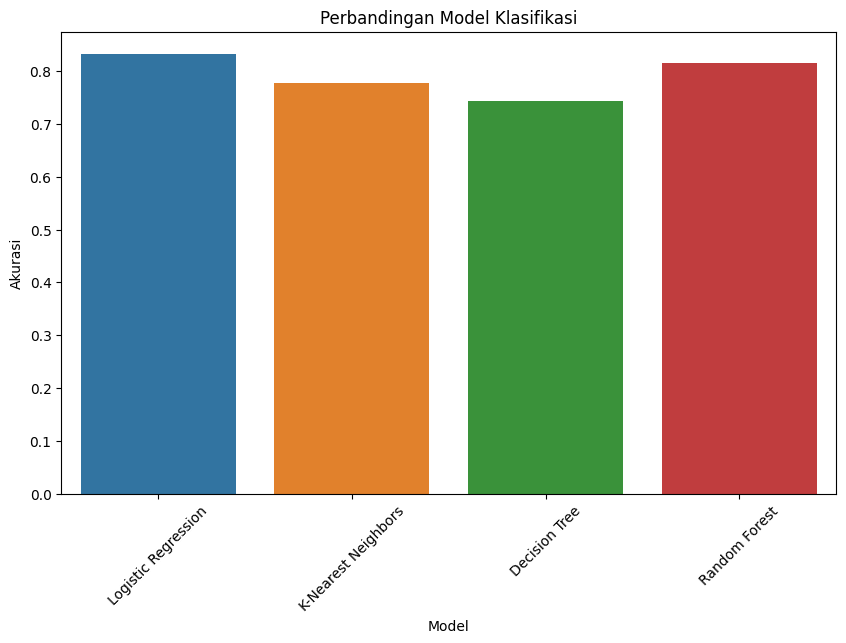

In [ ]:
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='macro')
  recall = recall_score(y_test, y_pred, average='macro')
  f1 = f1_score(y_test, y_pred, average='macro')
  return accuracy, precision, recall, f1
# Melatih dan mengevaluasi model
results = []
for name, model in models:
    model.fit(X_train, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    results.append([name, accuracy, precision, recall, f1])
# Menampilkan hasil dalam tabel perbandingan
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy',
'Precision', 'Recall', 'F1 Score'])
display(results_df)
# Visualisasi hasil dalam bentuk bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Perbandingan Model Klasifikasi')
plt.xticks(rotation=45)
plt.ylabel('Akurasi')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.832765,0.832765,0.832765,0.832765
1,K-Nearest Neighbors,0.778157,0.778157,0.778157,0.778157
2,Decision Tree,0.750853,0.750853,0.750853,0.750853
3,Random Forest,0.802048,0.802048,0.802048,0.802048


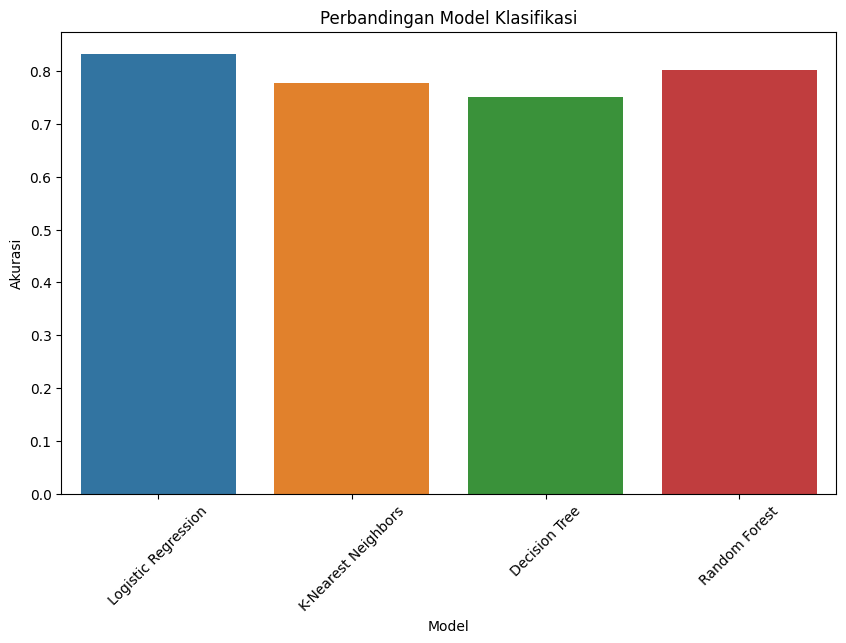

In [ ]:
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='micro')
  recall = recall_score(y_test, y_pred, average='micro')
  f1 = f1_score(y_test, y_pred, average='micro')
  return accuracy, precision, recall, f1
# Melatih dan mengevaluasi model
results = []
for name, model in models:
    model.fit(X_train, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    results.append([name, accuracy, precision, recall, f1])
# Menampilkan hasil dalam tabel perbandingan
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy',
'Precision', 'Recall', 'F1 Score'])
display(results_df)
# Visualisasi hasil dalam bentuk bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Perbandingan Model Klasifikasi')
plt.xticks(rotation=45)
plt.ylabel('Akurasi')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.832765,0.751323,0.832765,0.775248
1,K-Nearest Neighbors,0.778157,0.734945,0.778157,0.750190
2,Decision Tree,0.740614,0.750497,0.740614,0.745130
3,Random Forest,0.819113,0.789764,0.819113,0.786221


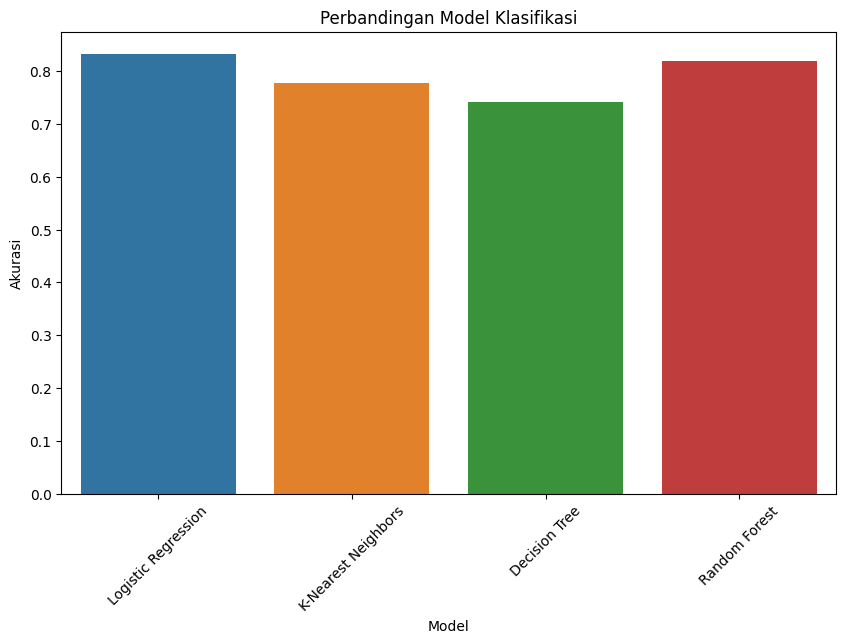

In [ ]:
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  return accuracy, precision, recall, f1
# Melatih dan mengevaluasi model
results = []
for name, model in models:
    model.fit(X_train, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    results.append([name, accuracy, precision, recall, f1])
# Menampilkan hasil dalam tabel perbandingan
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy',
'Precision', 'Recall', 'F1 Score'])
display(results_df)
# Visualisasi hasil dalam bentuk bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Perbandingan Model Klasifikasi')
plt.xticks(rotation=45)
plt.ylabel('Akurasi')
plt.show()